# Import Library

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import math
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [102]:
Mpath='/home/udit/Desktop/CLUSTER_240_DATA/Documents/Danish/00_Paper_Event_Synchronization_GitHub/'                                       # by this you can change the directory
os.chdir(Mpath)
!ls

Code_Event_synchronization.ipynb  Strength_of_Synchronization_2001_2010.npy
IMD_prec_2001_2010_monsoon.nc


In [116]:
arr = np.load('Strength_of_Synchronization_2001_2010.npy')
assert arr.shape == (4331,4331)

In [135]:
for i in range(1,10):
    if i < 9:
        np.save(f'Strength_of_Synchronization_2001_2010_Part{i}of9.npy', arr[(i-1)*512:i*512])
    else:
        np.save(f'Strength_of_Synchronization_2001_2010_Part{i}of9.npy', arr[(i-1)*512:])

In [8]:
# Imput data
fx = xr.open_dataset(Mpath+'IMD_prec_2001_2010_monsoon.nc')

In [9]:
fx

<xarray.Dataset>
Dimensions:    (TIME: 1220, LONGITUDE: 135, LATITUDE: 129)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2001-06-01 2001-06-02 ... 2010-09-30
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.0
    history:      Wed Aug 18 16:26:59 2021: cdo cat 1901.nc Data_1901.nc Data...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [ ]:
#ds =xr.open_dataset(paths)
#----------------------- ds.sel(TIME.year = slice(2001,2010))----------------------------
#ds = ds.sel(TIME = (ds.TIME.dt.year >= 2001) & (ds.TIME.dt.year <= 2010))

#-------------Take monsoon months-------------------------------------------
#ds = ds.sel(TIME = (ds.TIME.dt.month >= 6) & (ds.TIME.dt.month <= 9))


In [ ]:
# fxc.variables['TIME'][:]
# fxc

# To find the Extreme Event Series from Time series of Monsoon Months

In [17]:
df1=pd.read_csv(Ppath+'Lat_Lon_IMD_NEW.csv') 
df1

,Lat,Lon
0,8.25,77.00
1,8.25,77.25
2,8.25,77.50
3,8.50,76.75
4,8.50,77.00
...,...,...
4326,36.75,74.25
4327,36.75,74.50
4328,36.75,74.75
4329,36.75,75.00


In [19]:
lat=df1['Lat'].tolist()
lon=df1['Lon'].tolist()
data=[]
zipped=zip(lat,lon)                        # to make lat/lon pair or just a node address
for i ,j in zipped:
    dfxz=fx.sel(LONGITUDE=j,LATITUDE=i)
    data.append(dfxz) 

In [32]:
def my_key_values(data):
#------------------to add key values across each day-------------------------------------    
    y=np.arange(1,len(data.RAINFALL.data)+1,1)  
    yy=lambda data:data.RAINFALL*0 + y
    dataX=data.assign(Key_Value=yy)
    
#-------drop the dry days as days with rainfall less than 1 mm/day-----------
    dataY= dataX.where(dataX.RAINFALL>=1).dropna('TIME') 
    
#-------------------------- to define 90th percentile thrushold of a decade-----------------
    sx =np.percentile(dataY['RAINFALL'],90, axis = 0,interpolation= 'midpoint')   
    x5=int(dataY.RAINFALL[(dataY.RAINFALL)>=sx].count().data)    
    
#-----------------------------Sort in ascending order-------------------------------
    dff=dataY.sortby('RAINFALL',ascending=True)                                                     
    dff_last_a_percentile = dff.tail(x5)         
    dfx =dff_last_a_percentile.sortby('TIME',ascending=True)
    
#--------------------key values across extreme events---------------------------------
    key=list(dfx.Key_Value.data)
    return key

In [33]:
my_key_values(data[0])

/tmp/ipykernel_26557/3763242656.py:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  sx =np.percentile(dataY['RAINFALL'],90, axis = 0,interpolation= 'midpoint')


[12.0,
 112.0,
 114.0,
 115.0,
 116.0,
 117.0,
 403.0,
 415.0,
 432.0,
 465.0,
 498.0,
 546.0,
 549.0,
 585.0,
 591.0,
 632.0,
 633.0,
 634.0,
 644.0,
 645.0,
 686.0,
 712.0,
 718.0,
 719.0,
 721.0,
 727.0,
 728.0,
 754.0,
 755.0,
 765.0,
 779.0,
 834.0,
 838.0,
 900.0,
 913.0,
 946.0,
 947.0,
 952.0,
 953.0,
 983.0,
 1015.0,
 1058.0,
 1109.0,
 1110.0,
 1146.0]

In [42]:
nodes=10#len(data)   #len(dfx)
X = []
for i in range(nodes):
    X.append(my_key_values(data[i]))

/tmp/ipykernel_26557/3763242656.py:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  sx =np.percentile(dataY['RAINFALL'],90, axis = 0,interpolation= 'midpoint')
/tmp/ipykernel_26557/3763242656.py:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  sx =np.percentile(dataY['RAINFALL'],90, axis = 0,interpolation= 'midpoint')
/tmp/ipykernel_26557/3763242656.py:11: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method 

In [35]:
def c(X,Y):
    A = [X[ind+1] - X[ind] if ind < len(X)-1 else 0 for ind in range(len(X))]
    B = [X[ind] - X[ind-1] if ind > 0 else 0 for ind in range(len(X))]
    C = [Y[ind+1] - Y[ind] if ind < len(Y)-1 else 0 for ind in range(len(Y))]
    D = [Y[ind] - Y[ind-1] if ind > 0 else 0 for ind in range(len(Y))]
    ones = 0

    halves = 0
    def get_J(i,j):
        nonlocal halves
        nonlocal ones
        if X[i] == Y[j]:
            halves +=1
            return 0.5
        elif (X[i]-Y[j] > 0) and (X[i]-Y[j] < abs(min(A[i], B[i], C[j], D[j]) / 2.0)):
            ones += 1
            return 1
        else:
            return 0


    J_dict = {(i,j):get_J(i,j) for i in range(len(X)) for j in range(len(Y)) }

    return sum(list(J_dict.values()))

In [36]:
def syn_strength(Xi,Xj):
    xx=math.sqrt((len(Xi)*len(Xj)))
    Qi_j=(c(Xi,Xj)+c(Xj,Xi))/xx
    Qi_j=round(Qi_j,3)
    return Qi_j

In [51]:
syn_strength(X[0],X[8])

0.527

In [ ]:
array([1.   , 0.605, 0.33 , 0.671, 0.776, 0.298, 0.149, 0.172, 0.527,
       0.411])

In [54]:
os.chdir(Ppath)
!ls

 00_Paper_Event_Synchronization_GitHub
'01_Degree _centrality_and_degree_distribution_Thesis_gif.ipynb'
 01_Removal_Spatial_Corr_90
 01_Removal_Spatial_Corr_95
 01_Thesis_Animation_degree_degree_distribution_gif
 1_Spatial_Corr_removal_90
 2_Spatial_Corr_removal_95
 Actual_Link_length_of_all_nodes_ERE_90.npy
 Actual_Link_length_of_all_nodes_ERE_95.npy
 Adjacency_Matric_90ERE
 Adjacency_Matric_95ERE
 Annual_Maxima
 Annual_Maxima_Rainfall.npy
 Average_Degree_Centrality_of_whole_India_ERE_90.npy
 Average_Degree_Centrality_of_whole_India_ERE_95.npy
 Averaged_Frequency_95th_percentile.png
 Average_Link_Length_ERE_90
 Average_Link_Length_ERE_95
'Betweenness centrality'
 Central_India_Degree_Centrality.ipynb
 Central_India_nodes.npy
 codes_UB
 correlation_indices.png
 Danish_m_A.csv
 Decadal_wise_threshold_ERE_90
 Decadal_wise_threshold_new_ERE_90
 Degee_Centrality_Numpy_90
 Degree_Centrality_ERE_90
 Degree_Centrality_ERE_95
 Degree_Centrality_Numpy_95
'Degree Distribution_Plotting.ipynb'
 de

In [39]:
                                      # by this you can change the directory
os.chdir(Ppath+'results')
!ls

Decade_0.npy	Decade_51.npy
Decade_100.npy	Decade_52.npy
Decade_101.npy	Decade_53.npy
Decade_102.npy	Decade_54.npy
Decade_103.npy	Decade_55.npy
Decade_104.npy	Decade_56.npy
Decade_105.npy	Decade_57.npy
Decade_106.npy	Decade_58.npy
Decade_107.npy	Decade_59.npy
Decade_108.npy	Decade_5.npy
Decade_109.npy	Decade_60.npy
Decade_10.npy	Decade_61.npy
Decade_110.npy	Decade_62.npy
Decade_11.npy	Decade_63.npy
Decade_12.npy	Decade_64.npy
Decade_13.npy	Decade_65.npy
Decade_14.npy	Decade_66.npy
Decade_15.npy	Decade_67.npy
Decade_16.npy	Decade_68.npy
Decade_17.npy	Decade_69.npy
Decade_18.npy	Decade_6.npy
Decade_19.npy	Decade_70.npy
Decade_1.npy	Decade_71.npy
Decade_20.npy	Decade_72.npy
Decade_21.npy	Decade_73.npy
Decade_22.npy	Decade_74.npy
Decade_23.npy	Decade_75.npy
Decade_24.npy	Decade_76.npy
Decade_25.npy	Decade_77.npy
Decade_26.npy	Decade_78.npy
Decade_27.npy	Decade_79.npy
Decade_28.npy	Decade_7.npy
Decade_29.npy	Decade_80.npy
Decade_2.npy	Decade_81.npy
Decade_30.npy	Decade_82.npy
Decade_31.npy	D

In [43]:
SYN90=np.load(Ppath+'results/'+'Decade_100.npy')

In [46]:
SYN90[0][0:10]

array([1.   , 0.605, 0.33 , 0.671, 0.776, 0.298, 0.149, 0.172, 0.527,
       0.411])

In [52]:
os.chdir(Mpath)
!ls

Code_Event_synchronization.ipynb  IMD_prec_2001_2010_monsoon.nc


In [53]:
#np.save('Strength_of_Synchronization_2001_2010',SYN90)

In [55]:
res=SYN90

In [60]:
sum(res[0])

514.8520000000005

In [ ]:
Nx =data+data.transpose()           # Matrix tayaar hai

In [77]:
data = SYN90
Nx   =data+data.transpose()           # Matrix tayaar hai
Nxx=Nx-2*np.diag(np.diag(data))    # diagonal matrix is zero: considering zero value to self correlation
res=Nxx
r    = res[np.triu_indices(4331)]  # get the upper triangular part of this matrix
m    = np.percentile(r, 95)    # to take the 95Th percetile thrushold 

  # THRESHOLD 95th percentile of the correlation matrix value  
m



0.283

In [82]:
n1=n2=len(res[0])
Y = np.zeros([n1, n2])
for i in range(n1):
    for j in range(n2):
        if res[i][j]>=m:   # THRESHOLD 95th percentile of the correlation matrix value
            Y[i][j]=1
        else:
            Y[i][j] =0

In [87]:
sum(Y[:,1])

47.0

In [ ]:
#h = nx.from_numpy_matrix(outX)
#dc=nx.degree_centrality(h

In [90]:
dec=np.sum(Y,axis=1)

In [93]:
pathx='/home/udit/Desktop/CLUSTER_240_DATA/Documents/Danish/Lat_Lon_IMD_NEW.xlsx'
df1=pd.read_excel(pathx)
df=df1.drop(3596)
df.reset_index(drop=True, inplace=True)

In [99]:
def temporal_DC(G):
    output=G
    a=0.98
    b=0.02
    output[output > np.quantile(output,a)] =np.quantile(output,a)
    output[output < np.quantile(output,b)] =np.quantile(output,b)
    return output

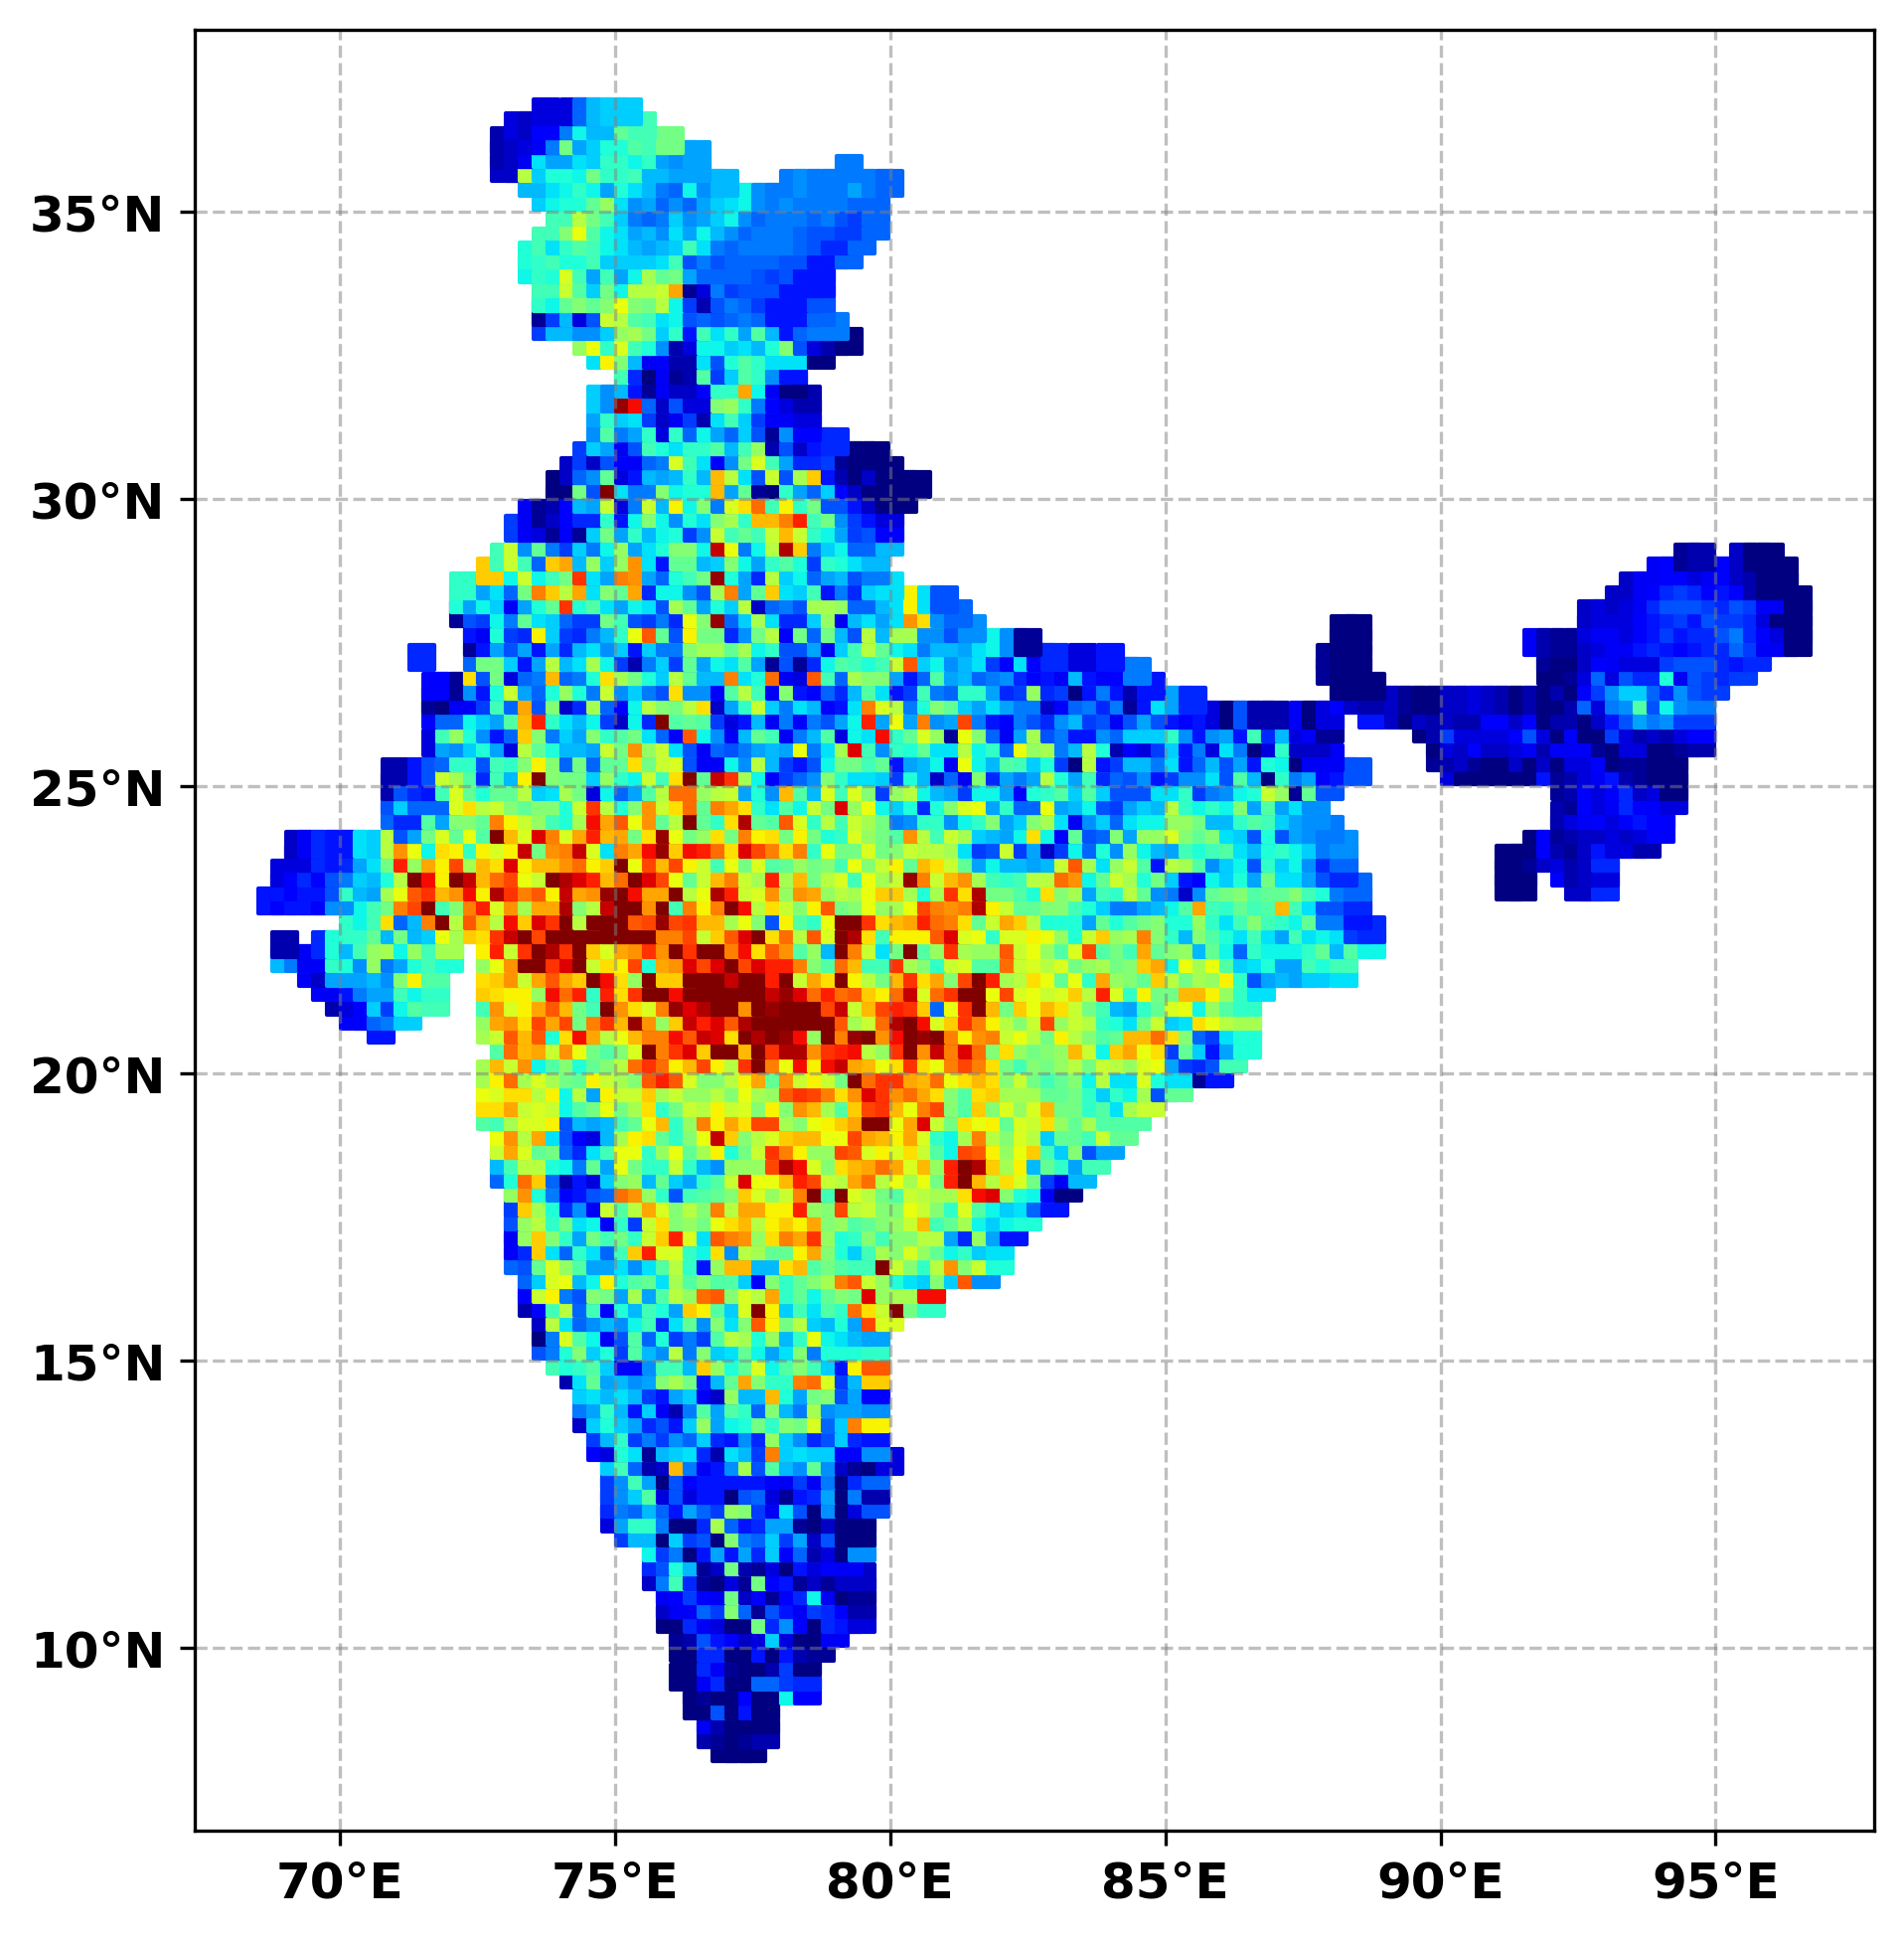

In [101]:
fig = plt.figure(figsize=(16,8),dpi=300)
D90=temporal_DC(dec)
#Ticks=tick90

Vmax=np.max(D90) 
Vmin=np.min(D90)

#---------------------------------------Subplot 1-------90th ERE--------------------------------------------

ax1 = plt.subplot(121)
im1=plt.scatter(x=df1['Lon'], y=df1['Lat'],s=36,c=D90,label="dx", cmap=plt.get_cmap("jet",50), alpha=1,  marker='s',vmax=Vmax,vmin=Vmin) 
plt.grid(color='gray',linestyle='--',alpha=0.5)
#shape_file.plot(ax = ax1, alpha=1, edgecolor='k',linestyle = 'solid', color = "None",linewidth=1)

# -------------------------------------To add X and Y axis Ticks ----------------------------------------

ax1.set_xticks([70,75,80,85,90,95])
ax1.set_xticklabels(['70°E','75°E','80°E','85°E','90°E','95°E'],weight='bold')
ax1.set_yticks([10,15,20,25,30,35])
ax1.set_yticklabels(['10°N','15°N','20°N','25°N','30°N','35°N'],weight='bold')
plt.tick_params(axis="both", labelsize=12)


# #-----------------------TO confine the Subplots---------------------------------------

# fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1,wspace=-0.05, hspace=0)

# #----------------------------------COLOR-BAR-----------------------------------------------
# axlist = [ax1]
# cb=fig.colorbar(im1, ax=axlist,orientation="vertical",extend='both',ticks=tick90
#                    ,aspect=25,fraction=0.045, pad=0.02,shrink=0.9) 
# cb.set_label(label="Degree centrality "+'$ (k)$',size='15',weight='bold')
# cb.ax.tick_params(labelsize=15)
#plt.savefig('/home/udit/danish/IMD_Analysis/Figure2/ERE_90/Figure_a_new',bbox_inches ="tight")
plt.show()